# 預處理

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [6]:
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

In [7]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [8]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建模

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [13]:
model = Sequential()

### 卷基層1

In [23]:
model.add(Conv2D(filters = 16,
                 kernel_size = (5, 5),
                 padding = 'same',
                 input_shape = (28, 28, 1),
                 activation = 'relu',
               ))

### 池化層1

In [24]:
model.add(MaxPooling2D(pool_size = (2, 2)))

### 卷基層2

In [25]:
model.add(Conv2D(filters = 36,
                 kernel_size = (5, 5),
                 padding = 'same',
#                  input_shape = (28, 28, 1),
                 activation = 'relu',
               ))

### 池化層2

In [26]:
model.add(MaxPooling2D(pool_size = (2, 2)))

### Dropout

In [27]:
model.add(Dropout(0.25))

### 平坦層

In [28]:
model.add(Flatten())

### 隱藏層

In [29]:
model.add(Dense(128, activation = 'relu'))

### Dropout

In [27]:
model.add(Dropout(0.25))

### 輸出層

In [30]:
model.add(Dense(10, activation = 'softmax'))

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# 訓練

In [34]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
train_history = model.fit(x = x_Train4D_normalize, y = y_TrainOneHot, validation_split = 0.2, epochs = 10, batch_size = 300, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 83s - loss: 0.3636 - acc: 0.8941 - val_loss: 0.0926 - val_acc: 0.9743
Epoch 2/10
 - 97s - loss: 0.0875 - acc: 0.9731 - val_loss: 0.0589 - val_acc: 0.9823
Epoch 3/10
 - 98s - loss: 0.0616 - acc: 0.9807 - val_loss: 0.0496 - val_acc: 0.9841
Epoch 4/10
 - 85s - loss: 0.0486 - acc: 0.9846 - val_loss: 0.0471 - val_acc: 0.9845
Epoch 5/10
 - 83s - loss: 0.0395 - acc: 0.9871 - val_loss: 0.0444 - val_acc: 0.9870
Epoch 6/10
 - 88s - loss: 0.0336 - acc: 0.9894 - val_loss: 0.0399 - val_acc: 0.9874
Epoch 7/10
 - 84s - loss: 0.0298 - acc: 0.9905 - val_loss: 0.0400 - val_acc: 0.9881
Epoch 8/10
 - 89s - loss: 0.0261 - acc: 0.9916 - val_loss: 0.0349 - val_acc: 0.9892
Epoch 9/10
 - 86s - loss: 0.0234 - acc: 0.9924 - val_loss: 0.0345 - val_acc: 0.9904
Epoch 10/10
 - 83s - loss: 0.0207 - acc: 0.9931 - val_loss: 0.0346 - val_acc: 0.9896


In [36]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

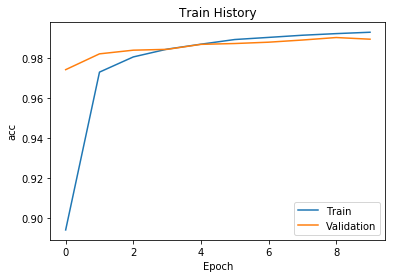

In [37]:
show_train_history(train_history, 'acc', 'val_acc')

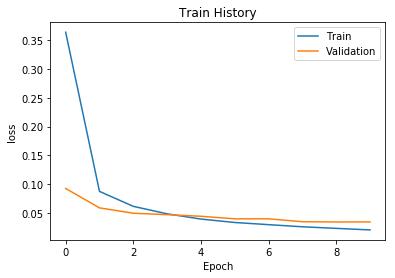

In [38]:
show_train_history(train_history, 'loss', 'val_loss')

In [40]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)

10000/10000 [==============================] - 7s 694us/step


In [41]:
scores

[0.025616105173208052, 0.991]

# 預測 

In [44]:
prediction = model.predict_classes(x_Test4D_normalize)

In [47]:
def plot_images_labels_prediction(images, labels, prediction, idx, num):
    fig = plt.gcf()
    fig.set_size_inches(15, 20)
    for i in range(0, num):
        ax = plt.subplot(10, 10, 1 + i)
        ax.imshow(images[idx], cmap = 'binary')
        title = 'label: ' + str(labels[idx])
        if len(prediction) > 0:
            title = title + '\n' + 'prediction: ' + str(prediction[idx])
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

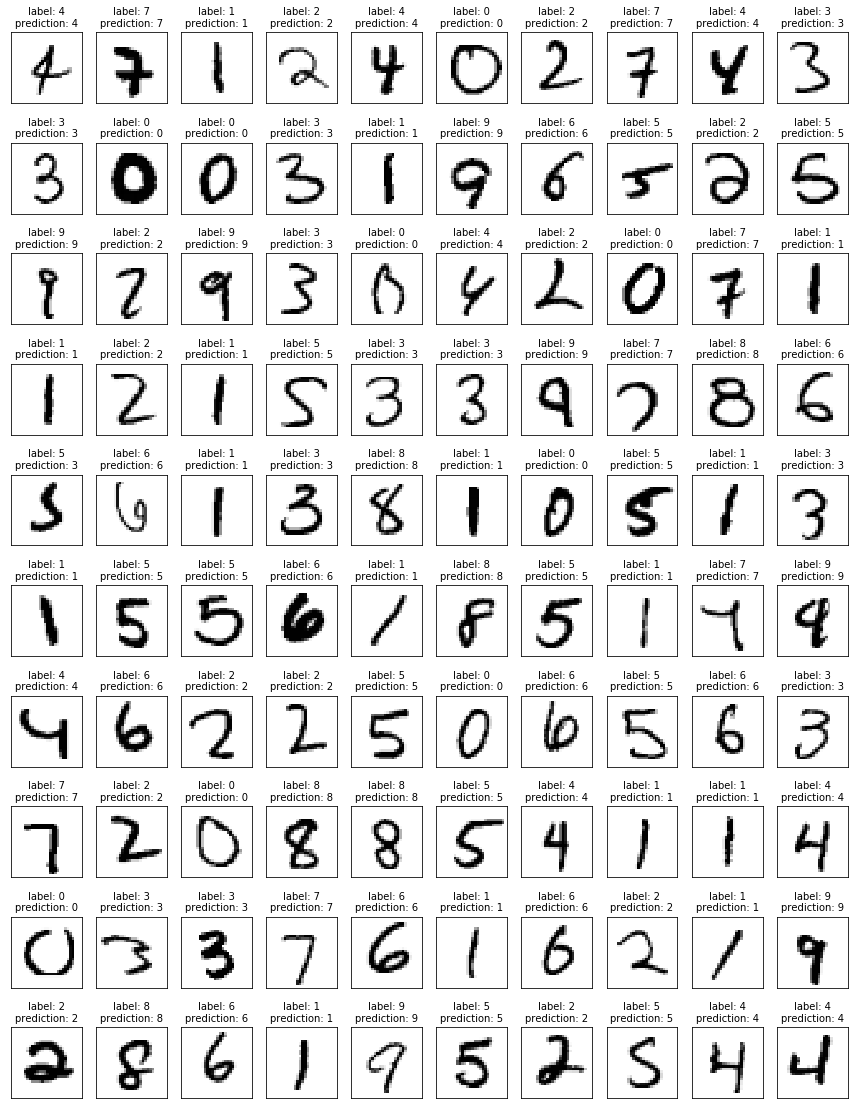

In [49]:
plot_images_labels_prediction(x_Test, y_Test, prediction, 300, 100)